# Homework 1

### Deadline: Wednesday 19 March 2024 (by 19h00)

### Credits: 20 points

### Instructions:

- When you finish, please submit a single **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The homework is individual. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems.

# Name: Silva Alejandro

## 1. Thermodynamics of ideal and real gases (10 points)

The equation of state (EOS) for ideal gases is given by:

$$P\,V = n\,R\,T$$

where:
- $P$ is the pressure,
- $V$ is the volume,
- $T$ is the temperature,
- $R = 0.08206\,\rm L\,atm/(mol\,K)$ is the ideal gas constant,
- $n$ is the number of moles.

On the other hand, real gases can be modeled with the van der Waals equation (EOS):

$$\left(P + \frac{n^2 a}{V^2}\right)(V - n\,b) = n\,R\,T$$

where $a$ and $b$ are constants that depend on the gas composition. The table below shows typical values of these constants for 6 gases:

| Gas             | $a\,\rm (L^2\,atm/mol^2)$ | $b\,\rm (L/mol)$ |
|-----------------|---------------------|-----------------|
| Hydrogen ($\rm H_2$)   | 0.248               | 0.0266          |
| Nitrogen ($\rm N_2$)   | 1.370               | 0.0387          |
| Oxygen ($\rm O_2$)     | 1.382               | 0.0319          |
| Chlorine ($\rm Cl_2$)  | 6.579               | 0.0562          |
| Carbon Dioxide ($\rm CO_2$) | 3.592          | 0.0427          |
| Methane ($\rm C\,H_4$)   | 2.253             | 0.0428          |


##### Reference: https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)


In [1]:
#Import useful libraries
import numpy as np
import matplotlib.pyplot as plt

#### (a) Create a python function that reads $n$, $T$, $V$, $a$, $b$ and returns a two-element tuple with the thermal pressures $P$, calculated with the ideal gas equation and the van der Waals equation.

In [9]:
def calculate_pressure(V, n, T, a, b):
  """
  This function returns a two-element tuple with the thermal pressures calculated using the ideal gas equation and
  the Van der Waals equation.
  Inputs: n (float, is the number of moles), T (float, is the temperature in K), V (array, is the volume in L), \
  a (float, constant dependent on gas composition in L^2 atm/ mol^2),  b (float, constant dependent on gas composition in L/mol),\
  R(ideal gas constant, in L atm/mol K)

  Outputs: p_tuple (two element tuple with p_ideal and p_real, the units of both are atm)

  Algoritm:
    Create an empty list
    Compute p_ideal using the equation for ideal gases
    Store p_ideal in the empty list
    Compute p_real using the Van der Waals equation
    Store p_real in the list
    Unpack the list to a tuple
    Return the tuple

  Author: AlejoS
  Date modified: 11/03/2025
  """
  R = 0.08206 #[L atm/mol K] define the ideal gas constant
  p_list = []
    
  p_ideal = n*R*T/V
  p_list.append(p_ideal)
    
  p_real = n*R*T/(V-n*b) - n**2*a/V**2
  p_list.append(p_real)

  (p_i, p_r) = p_list
  p_tuple = (p_i, p_r)

  return p_tuple

#### (b) Define a python dictionary containing the identifiers of all 6 gases as "keys" with their respective $a$ and $b$ constants as elements.

In [3]:
gas_composition_constants = {}
gas_composition_constants.update({"H2": (0.248, 0.0266), "N2":(1.370, 0.0387) , "O2":(1.382, 0.0319),\
                                  "Cl2":(6.579, 0.0562), "CO2":(3.592, 0.0427), "CH4":(2.253, 0.0428)}) #a first element, b second element

I saved the constants inside a tuple for each gas. Maybe a list would be better?

In [4]:
#Safe check
#gas_composition_constants.keys()
#print(gas_composition_constants)

#### (c) Generate a 1D volume vector covering the range from $0.5$ to $5\,\rm L$, and fix the number of moles at $n=1\,\rm mol$ and the temperature of the gas at $T=298\,\rm K$.

In [5]:
n_1 = 1 #fix the number of moles
T_1 = 298 #fix the temperature of the gas

V_1 = np.arange(0.5, 5., 0.01) #generate the 1D volume vector

#### (d) Using the values of $a$ and $b$ from the dictionary in point (b), and the inputs in defined (c), call the function created in point (a) to obtain a set of pressure arrays, $P$, with both equations of state for each gas. (**Hint:** a for loop can help access the dictionary elements).

In [6]:
list_pressures = []
for constant in gas_composition_constants.values():
    p_tuple = calculate_pressure(V_1, n_1, T_1, constant[0], constant[1])
    list_pressures.append(p_tuple)

p_array_1 = np.array(list_pressures)
#p_array = p_array_1.flatten()
  
#Safe check
#print(p_array_1)
# print(type(p_array))
# print(p_array.shape)
#print(p_array)

#### (e) Use matplotlib to make a high-quality, labeled, multi-panel figure of the thermal pressure (calculated with both EOS) of all 6 gases as a function of volume. The plot should have $P$ on the Y axis and $V$ on the X axis.

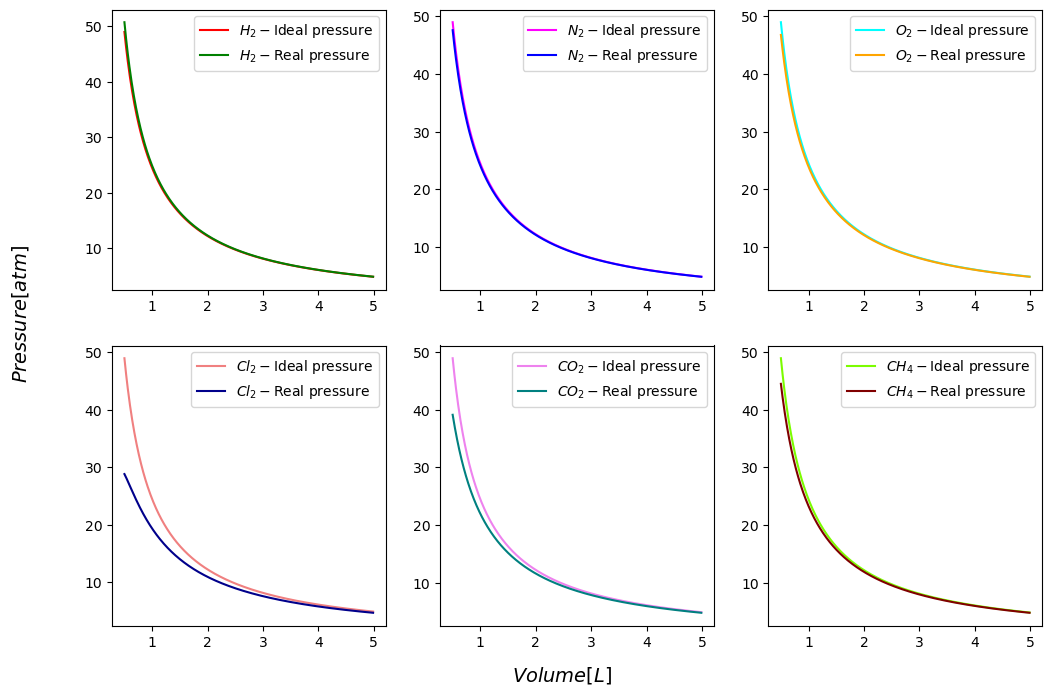

In [7]:
# Method 2: Multi-panel figure using axes objects 

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 8))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten() 

ax1.plot(V_1, p_array_1[0,0], color = "red", label = r"$H_{2}-\text{Ideal pressure}$")
ax1.plot(V_1, p_array_1[0,1], color = "green", label = r"$H_{2}-\text{Real pressure}$")
ax1.legend()
ax2.plot(V_1, p_array_1[1,0], color = "magenta", label = r"$N_{2}-\text{Ideal pressure}$")
ax2.plot(V_1, p_array_1[1,1], color = "blue", label = r"$N_{2}-\text{Real pressure}$")
ax2.legend()
ax3.plot(V_1, p_array_1[2,0], color = "cyan", label = r"$O_{2}-\text{Ideal pressure}$")
ax3.plot(V_1, p_array_1[2,1], color = "orange", label = r"$O_{2}-\text{Real pressure}$")
ax3.legend()
ax4.plot(V_1, p_array_1[3,0], color = "lightcoral", label = r"$Cl_{2}-\text{Ideal pressure}$")
ax4.plot(V_1, p_array_1[3,1], color = "darkblue", label = r"$Cl_{2}-\text{Real pressure}$")
ax4.legend()
ax5.plot(V_1, p_array_1[4,0], color = "violet", label = r"$CO_{2}-\text{Ideal pressure}$")
ax5.plot(V_1, p_array_1[4,1], color = "teal", label = r"$CO_{2}-\text{Real pressure}$")
ax5.legend()
ax6.plot(V_1, p_array_1[5,0], color = "lawngreen", label = r"$CH_{4}-\text{Ideal pressure}$")
ax6.plot(V_1, p_array_1[5,1], color = "maroon", label = r"$CH_{4}-\text{Real pressure}$")
ax6.legend()

fig.text(0.5, 0.04, r"$Volume [L]$", ha='center', fontsize=14)
fig.text(0.04, 0.5, r"$Pressure [atm]$", va='center', rotation='vertical', fontsize=14)

plt.show()
plt.close()

#### (f) Now, we want to represent the gas temperature surfaces on the PV plane. Create a new python function that reads $n$, $P$, $V$, $a$, $b$ and returns a two-element tuple with the temperatures $T$, calculated with the ideal gas equation and the van der Waals equation.

## 2. Period of the tide using sea level data (10 points)

The goal of this exercise is to calculate the period of the sea level change with the tide in Ecuador. For this, we are going to use sea level measurements from the data base of the University of Hawaii:

http://uhslc.soest.hawaii.edu/data/?fd

These data sets were collected from more than $500$ tide gauge stations across the globe.

##### Reference: Caldwell, P. C., M. A. Merrifield, P. R. Thompson (2015), Sea level measured by tide gauges from global oceans — the Joint Archive for Sea Level holdings (NCEI Accession 0019568), Version 5.5, NOAA National Centers for Environmental Information, Dataset, doi:10.7289/V5V40S7W.

### Coding tasks:

#### Python I/O:

**(a)** Go to the website of the sea level database and search for measurments from Ecuador. Download the "Research Quality" "hourly" data for all three stations in Ecuador (Santa Cruz, Baltra, and La Libertad). Inspect the data file structure. These data sets are **csv** files with 5 columns each (year, month, day, hour, sea level). The units of the sea level data are $\rm mm$.

**(b)** Create an I/O function that uses pandas to read in the data from these files and return the columns as numpy arrays. You will use the hour and sea level columns for the analysis below.

**(c)** Plot the sea level measurements against the hours for all stations for a first inspection. You will notice there are outliers. Outliers show up as negative values that occur when instruments fail or measurements are missing.

#### Indexing and clean-up:

**(d)** Create a clean-up function that removes extreme outliers from the data using indexing. Plot again the sea level measurements against the hours for all stations, but using the cleaned-up data wihtout outliers.

#### Regression and goodness-of-fit tests:

**(e)** Calculate the average sea level at each hour for Santa Cruz and make a plot of average sea level against hours. Based on the observed trend, propose a model to describe the tide.

**(f)** Fit your model to the data to study the hourly change of the sea level also known as the tide (if you use curvefit() for the regression, I suggest providing ansatz values). Report the best-fit function including uncertainties.

**(g)** Carry out a goodness-of-fit test. For this you need a function that computes the global $\chi^2$ statistic, the number of degrees of freedom, and the reduced $\chi^2$ statistic. Use your function to evaluate your regression.

**(h)** Construct the confidence intervals and show them in 2D parameter space/s. For this you should evaluate the $\chi^2$ statistic in the vicinity of the best-fit values for the free parameters in your model. The confidence interval maps should have one free parameter in the X axis, another free parameter in the Y axis, and the projected $\chi^2$ hypersurface in the $Z$ axis. **Hints:** to create a 2D parameter space as a meshgrid, you should first create vectors with numbers around the best-fit values found in your regressions. 1D plots showing $\chi^2$ as a function of each free parameter may help identify optimal numbers.

### Analysis tasks:

**(i)** Based on the fitted function, what period does the tide in Santa Cruz have? What do the confidence intervals tell us?

**(j)** Can the same model be applied to the other 2 stations (Baltra and La Libertad)? If not, report appropriate best-fit functions for these stations too.